In [22]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=13)
model=nn.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


In [66]:
diff=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [67]:
diff.to_csv('diabetes_data.csv')

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85, 14],
       [21, 34]], dtype=int64)

In [69]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TP, FN, TN, FP)

34 21 85 14


In [70]:
Model_Accuracy=(TP+TN)/(TP+TN+FN+FP)
print("Accuracy Score:",Model_Accuracy)

Accuracy Score: 0.7727272727272727


In [71]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.7727272727272727

In [72]:
Error_Rate=1-Model_Accuracy
print("Error Rate:", Error_Rate)

Error Rate: 0.2272727272727273


In [73]:
Sensitivity= TP / (TP + FN)
print("Sensitivity:",Sensitivity)

Sensitivity: 0.6181818181818182


In [74]:
Specificity= TN / (TN + FP)
print("Specificity:",Specificity)

Specificity: 0.8585858585858586


In [75]:
from sklearn.metrics import recall_score
print("Sensitivity:",recall_score(y_test,y_pred))
print("Specificity:",recall_score(y_test,y_pred,pos_label=0))

Sensitivity: 0.6181818181818182
Specificity: 0.8585858585858586


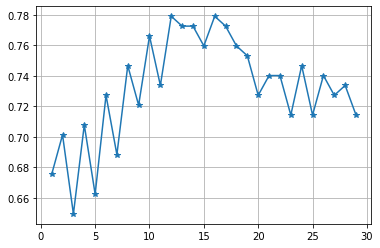

[0.6753246753246753, 0.7012987012987013, 0.6493506493506493, 0.7077922077922078, 0.6623376623376623, 0.7272727272727273, 0.6883116883116883, 0.7467532467532467, 0.7207792207792207, 0.7662337662337663, 0.7337662337662337, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7597402597402597, 0.7792207792207793, 0.7727272727272727, 0.7597402597402597, 0.7532467532467533, 0.7272727272727273, 0.7402597402597403, 0.7402597402597403, 0.7142857142857143, 0.7467532467532467, 0.7142857142857143, 0.7402597402597403, 0.7272727272727273, 0.7337662337662337, 0.7142857142857143]


In [76]:
k=[]
for i in range(1,30):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    from sklearn.metrics import accuracy_score
    k.append(accuracy_score(y_test,y_pred))
import matplotlib.pyplot as plt
plt.plot(range(1,30),k,marker="*")
plt.grid()
plt.show()
print(k)